## Importing libraries


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
#Creating the data & labels lists
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = (r'D:\TrafficSigns')

In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i)) #This method returns a string which represents the concatenated path components. 
    images = os.listdir(path) #This method returns the list of all files and directories in the specified path. The return type of this method is list.
    for a in images:
        image = cv2.imread(path + '\\'+ a)
        image = cv2.resize(image,(30,30)) #returns np array
       
        data.append(image)
        labels.append(i)
data=np.array(data)
labels=np.array(labels)
       

In [4]:
print(data.shape, labels.shape)
#39209

(39209, 30, 30, 3) (39209,)


In [5]:
#Spliting data into training data & validation data
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=0)

In [6]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
X_train[0]

array([[[22, 20, 23],
        [23, 21, 24],
        [23, 22, 24],
        ...,
        [21, 19, 21],
        [20, 18, 21],
        [20, 19, 21]],

       [[21, 19, 21],
        [20, 19, 21],
        [21, 21, 22],
        ...,
        [20, 18, 21],
        [20, 18, 20],
        [20, 18, 21]],

       [[20, 19, 21],
        [21, 20, 22],
        [20, 20, 22],
        ...,
        [19, 17, 20],
        [19, 18, 20],
        [20, 19, 21]],

       ...,

       [[20, 18, 21],
        [21, 19, 20],
        [20, 18, 20],
        ...,
        [18, 17, 20],
        [18, 17, 18],
        [20, 18, 19]],

       [[21, 18, 21],
        [21, 19, 21],
        [21, 19, 22],
        ...,
        [18, 16, 19],
        [19, 17, 18],
        [19, 17, 19]],

       [[19, 17, 19],
        [20, 18, 20],
        [21, 19, 21],
        ...,
        [18, 15, 17],
        [17, 15, 17],
        [16, 15, 18]]], dtype=uint8)

In [8]:
#Cast all features to float32
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

In [9]:
X_train[0]

array([[[0.08627451, 0.07843138, 0.09019608],
        [0.09019608, 0.08235294, 0.09411765],
        [0.09019608, 0.08627451, 0.09411765],
        ...,
        [0.08235294, 0.07450981, 0.08235294],
        [0.07843138, 0.07058824, 0.08235294],
        [0.07843138, 0.07450981, 0.08235294]],

       [[0.08235294, 0.07450981, 0.08235294],
        [0.07843138, 0.07450981, 0.08235294],
        [0.08235294, 0.08235294, 0.08627451],
        ...,
        [0.07843138, 0.07058824, 0.08235294],
        [0.07843138, 0.07058824, 0.07843138],
        [0.07843138, 0.07058824, 0.08235294]],

       [[0.07843138, 0.07450981, 0.08235294],
        [0.08235294, 0.07843138, 0.08627451],
        [0.07843138, 0.07843138, 0.08627451],
        ...,
        [0.07450981, 0.06666667, 0.07843138],
        [0.07450981, 0.07058824, 0.07843138],
        [0.07843138, 0.07450981, 0.08235294]],

       ...,

       [[0.07843138, 0.07058824, 0.08235294],
        [0.08235294, 0.07450981, 0.07843138],
        [0.07843138, 0

## Convert labels to onehot encoding

In [10]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

## Building the model

In [11]:
model = Sequential()

#Feature extraction
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

#classification
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

## Training

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_val, y_val))



Epoch 1/20
981/981 [==============================] - 98s 99ms/step - loss: 1.3461 - accuracy: 0.6236 - val_loss: 0.1737 - val_accuracy: 0.9559
Epoch 2/20
981/981 [==============================] - 120s 122ms/step - loss: 0.2592 - accuracy: 0.9219 - val_loss: 0.0854 - val_accuracy: 0.9764
Epoch 3/20
981/981 [==============================] - 88s 90ms/step - loss: 0.1659 - accuracy: 0.9503 - val_loss: 0.0564 - val_accuracy: 0.9834
Epoch 4/20
981/981 [==============================] - 85s 87ms/step - loss: 0.1185 - accuracy: 0.9649 - val_loss: 0.0494 - val_accuracy: 0.9883
Epoch 5/20
981/981 [==============================] - 89s 91ms/step - loss: 0.1048 - accuracy: 0.9688 - val_loss: 0.0341 - val_accuracy: 0.9912
Epoch 6/20
981/981 [==============================] - 87s 89ms/step - loss: 0.0811 - accuracy: 0.9757 - val_loss: 0.0387 - val_accuracy: 0.9907
Epoch 7/20
981/981 [==============================] - 85s 86ms/step - loss: 0.0816 - accuracy: 0.9760 - val_loss: 0.0309 - val_accurac

## Accuracy and Loss

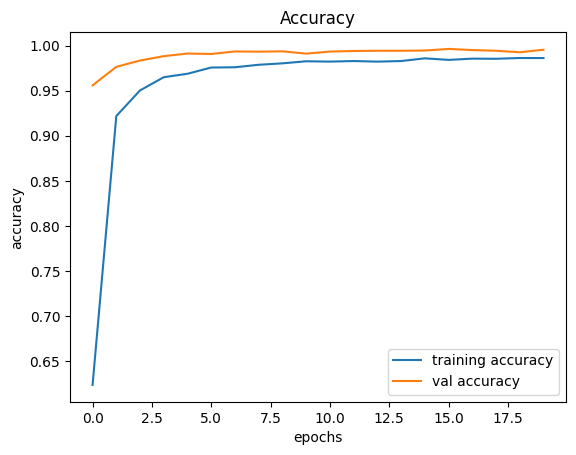

In [14]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

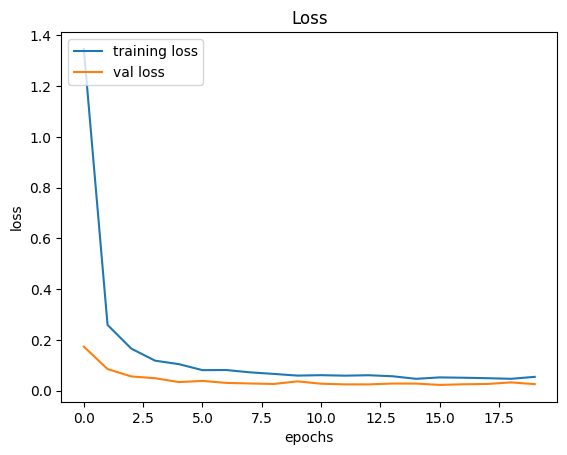

In [15]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()

## Testing the data

In [16]:
def testing(testcsv):
    data_test = pd.read_csv(testcsv)
    y_test = np.array(data_test["ClassId"].values)
    imgs = data_test["Path"].values
    X_test=[]
    for img in imgs:
        image = cv2.imread(img)
        image = cv2.resize(image,(30,30))
        image = np.array(image)
        X_test.append(image)
    X_test=np.array(X_test)

    return X_test,y_test

In [17]:
X_test, y_test = testing('Test.csv')

In [18]:
X_test=X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 43)

In [21]:

model.evaluate(X_test,y_test)

395/395 [==============================] - 8s 21ms/step - loss: 0.1569 - accuracy: 0.9741


[0.15693502128124237, 0.9741092920303345]

In [22]:
y_pred = model.predict(X_test)

395/395 [==============================] - 33s 82ms/step


In [23]:
y_pred = np.argmax(y_pred, axis=1) 
y_test = np.argmax(y_test, axis=1)

In [24]:
print(accuracy_score(y_test, y_pred))

0.9741092636579572


## Viewing image

In [25]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [26]:
def test_on_img(img):
    data=[]
    image = cv2.imread(img)
    image = cv2.resize(image,(30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred=model.predict(X_test)
    Y_pred=np.argmax(Y_pred,axis=1)
    return image,Y_pred

1/1 [==============================] - 1s 975ms/step
Predicted traffic sign is:  Speed limit (30km/h)


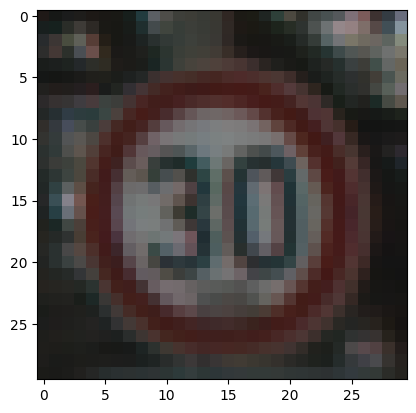

In [27]:
imgTest,prediction = test_on_img(r'D:\TrafficSigns\Test\00508.png')
prediction=int(prediction)
print("Predicted traffic sign is: ", classes[prediction])
plt.imshow(cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB))
plt.show()